# Top 10 Actors/Actresses


# 1. Import Data

In [11]:
import sqlite3
import pandas as pd 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [12]:
bom_movie_gross = pd.read_csv('data/zippedData/bom.movie_gross.csv.gz')
tmbd = pd.read_csv('data/zippedData/tmdb.movies.csv.gz')
title_crew = pd.read_csv('data/zippedData/imdb.title.crew.csv.gz')
name_basics = pd.read_csv('data/zippedData/imdb.name.basics.csv.gz')
title_p =pd.read_csv('data/zippedData/imdb.title.principals.csv.gz')
title_b =pd.read_csv('data/zippedData/imdb.title.basics.csv.gz')
movies =pd.read_csv('data/zippedData/tmdb.movies.csv.gz')
ratings = pd.read_csv('data/zippedData/imdb.title.ratings.csv.gz')

# Data Cleaning

Get the shape of data that is being used.

In [13]:
print(name_basics.shape)
print(title_p.shape)


(606648, 6)
(1028186, 6)


Clean names from the dataframe.

In [14]:
name_basics['nconst'].isna().sum()

0

Sort the name basics file.

In [15]:
name_basics = name_basics.sort_values(by=['primary_name'])

In [16]:
name_basics


,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
334669,nm6950093,!'aru Ikhuisi Piet Berendse,NaN,NaN,NaN,tt4245110
480537,nm6750303,$hutter,NaN,NaN,actor,"tt4049298,tt1398426,tt2080374,tt1741273"
68747,nm10554376,'A.J.' Marriot,NaN,NaN,"writer,miscellaneous",NaN
177430,nm2764095,'Atlas' Ramachandran,NaN,NaN,"actor,director","tt3433162,tt1311658,tt2333760,tt0928194"
252452,nm5169037,'Atolomake Helu,NaN,NaN,NaN,tt1966622
...,...,...,...,...,...,...
251954,nm4964487,Þórir Bragason,NaN,NaN,composer,tt2316669
361353,nm8372002,Þórir Ingvarsson,NaN,NaN,"cinematographer,sound_department",tt5977838
93977,nm10211575,Þórunn Lárusdóttir,NaN,NaN,"actor,writer,editor",tt9174804
173454,nm1800527,Þórunn Lárusdóttir,NaN,NaN,"actress,director","tt9174804,tt5881406,tt0439436,tt1245694"


Find how many null values are in the dataframe.

In [48]:
name_basics['nconst'].isna().sum()

0

Search for dupilcates.

In [18]:
names_dupes = name_basics.loc[name_basics.duplicated(subset=['primary_name'],keep=False) == True]
names_dupes

,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
129377,nm10275444,A. Venkatesh,NaN,NaN,director,tt9319898
387377,nm8956236,A. Venkatesh,NaN,NaN,producer,tt6834466
279631,nm4062141,A. Venkatesh,NaN,NaN,"director,actor,writer","tt4976496,tt6765648,tt4318038,tt6827080"
156216,nm1701176,A. Venkatesh,NaN,NaN,"cinematographer,camera_department,editor","tt0984177,tt0327761,tt0072026,tt4160030"
30159,nm0451160,A.J. Khan,1977.0,NaN,"actress,make_up_department,director","tt0203536,tt1651142,tt0367014,tt0323108"
...,...,...,...,...,...,...
433984,nm6356309,Özgür Bakar,NaN,NaN,"director,writer,producer","tt4368072,tt10046236,tt7717990,tt4764942"
102820,nm2561272,Øystein Mamen,NaN,NaN,"cinematographer,camera_department,editor","tt2713778,tt6275296,tt3541092,tt0966566"
603769,nm8122779,Øystein Mamen,NaN,NaN,cinematographer,tt2660730
93977,nm10211575,Þórunn Lárusdóttir,NaN,NaN,"actor,writer,editor",tt9174804


In [19]:
id_dupes = name_basics.loc[name_basics.duplicated(subset=['nconst'],keep=False) == True]
id_dupes

,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles


Find the shapes of the name basics.

In [20]:

print(names_dupes.shape)
print(name_basics.shape)
print(50865/606648)

(50865, 6)
(606648, 6)
0.08384598646991336


Drop Duplicates.

In [21]:
name_basics = name_basics.drop_duplicates(subset=['primary_name'], keep=False,)

In [22]:
name_basics

,nconst,primary_name,birth_year,death_year,primary_profession,known_for_titles
334669,nm6950093,!'aru Ikhuisi Piet Berendse,NaN,NaN,NaN,tt4245110
480537,nm6750303,$hutter,NaN,NaN,actor,"tt4049298,tt1398426,tt2080374,tt1741273"
68747,nm10554376,'A.J.' Marriot,NaN,NaN,"writer,miscellaneous",NaN
177430,nm2764095,'Atlas' Ramachandran,NaN,NaN,"actor,director","tt3433162,tt1311658,tt2333760,tt0928194"
252452,nm5169037,'Atolomake Helu,NaN,NaN,NaN,tt1966622
...,...,...,...,...,...,...
196669,nm1940028,Þórhallur Gunnarsson,NaN,NaN,"producer,actor","tt9100536,tt6770148,tt7690774,tt5038858"
276289,nm5352411,Þórhallur Þórhallsson,NaN,NaN,"actor,writer","tt3505804,tt5711254,tt7893482,tt5497896"
251954,nm4964487,Þórir Bragason,NaN,NaN,composer,tt2316669
361353,nm8372002,Þórir Ingvarsson,NaN,NaN,"cinematographer,sound_department",tt5977838


In [23]:
print(name_basics.shape)
print(606648-555783)

(555783, 6)
50865


In [24]:
title_p.columns.str.replace(' ', '')
title_p.head()

,tconst,ordering,nconst,category,job,characters
0,tt0111414,1,nm0246005,actor,NaN,"[""The Man""]"
1,tt0111414,2,nm0398271,director,NaN,NaN
2,tt0111414,3,nm3739909,producer,producer,NaN
3,tt0323808,10,nm0059247,editor,NaN,NaN
4,tt0323808,1,nm3579312,actress,NaN,"[""Beth Boothby""]"


Check for null values in title principles.

In [25]:

title_p['nconst'].isna().sum()

0

Sorting values in dataframe by nconst

In [26]:
title_p = title_p.sort_values(by=['nconst'])
title_p.head()

,tconst,ordering,nconst,category,job,characters
263152,tt2053352,4,nm0000002,archive_footage,NaN,"[""Herself""]"
15288,tt1626811,4,nm0000002,self,NaN,"[""Herself - Interviewee""]"
223302,tt0858500,2,nm0000002,actress,NaN,"[""May""]"
252036,tt1368858,1,nm0000002,actress,NaN,"[""Anne-Marie""]"
229763,tt1714820,3,nm0000003,archive_footage,NaN,"[""Herself""]"


In [27]:
principals_dupes = title_p.loc[title_p.duplicated(subset=['nconst'],keep=False) == True]
principals_dupes.shape

(582339, 6)

Merging title principles and name basics into a single column.

In [28]:
principals_and_names = pd.merge(
    title_p,
    name_basics,
    how='inner',
    on ='nconst')
principals_and_names.head(30)

,tconst,ordering,nconst,category,job,characters,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,tt2053352,4,nm0000002,archive_footage,NaN,"[""Herself""]",Lauren Bacall,1924.0,2014.0,"actress,soundtrack","tt0038355,tt0117057,tt0071877,tt0037382"
1,tt1626811,4,nm0000002,self,NaN,"[""Herself - Interviewee""]",Lauren Bacall,1924.0,2014.0,"actress,soundtrack","tt0038355,tt0117057,tt0071877,tt0037382"
2,tt0858500,2,nm0000002,actress,NaN,"[""May""]",Lauren Bacall,1924.0,2014.0,"actress,soundtrack","tt0038355,tt0117057,tt0071877,tt0037382"
3,tt1368858,1,nm0000002,actress,NaN,"[""Anne-Marie""]",Lauren Bacall,1924.0,2014.0,"actress,soundtrack","tt0038355,tt0117057,tt0071877,tt0037382"
4,tt1714820,3,nm0000003,archive_footage,NaN,"[""Herself""]",Brigitte Bardot,1934.0,NaN,"actress,soundtrack,producer","tt0049189,tt0057345,tt0054452,tt0059956"
5,tt2004245,1,nm0000003,archive_footage,NaN,"[""Herself""]",Brigitte Bardot,1934.0,NaN,"actress,soundtrack,producer","tt0049189,tt0057345,tt0054452,tt0059956"
6,tt4323536,3,nm0000003,archive_footage,NaN,"[""Herself""]",Brigitte Bardot,1934.0,NaN,"actress,soundtrack,producer","tt0049189,tt0057345,tt0054452,tt0059956"
7,tt2327430,2,nm0000005,archive_footage,NaN,"[""Himself""]",Ingmar Bergman,1918.0,2007.0,"writer,director,actor","tt0069467,tt0050986,tt0083922,tt0050976"
8,tt2056773,1,nm0000005,archive_footage,NaN,NaN,Ingmar Bergman,1918.0,2007.0,"writer,director,actor","tt0069467,tt0050986,tt0083922,tt0050976"
9,tt9209768,1,nm0000005,self,NaN,"[""Himself (voice)""]",Ingmar Bergman,1918.0,2007.0,"writer,director,actor","tt0069467,tt0050986,tt0083922,tt0050976"


Filter out the professions that are not actors.

In [29]:
actors = principals_and_names[principals_and_names["primary_profession"].str.contains('actor|actress', na=False)]

In [30]:
actors.head()

,tconst,ordering,nconst,category,job,characters,primary_name,birth_year,death_year,primary_profession,known_for_titles
0,tt2053352,4,nm0000002,archive_footage,NaN,"[""Herself""]",Lauren Bacall,1924.0,2014.0,"actress,soundtrack","tt0038355,tt0117057,tt0071877,tt0037382"
1,tt1626811,4,nm0000002,self,NaN,"[""Herself - Interviewee""]",Lauren Bacall,1924.0,2014.0,"actress,soundtrack","tt0038355,tt0117057,tt0071877,tt0037382"
2,tt0858500,2,nm0000002,actress,NaN,"[""May""]",Lauren Bacall,1924.0,2014.0,"actress,soundtrack","tt0038355,tt0117057,tt0071877,tt0037382"
3,tt1368858,1,nm0000002,actress,NaN,"[""Anne-Marie""]",Lauren Bacall,1924.0,2014.0,"actress,soundtrack","tt0038355,tt0117057,tt0071877,tt0037382"
4,tt1714820,3,nm0000003,archive_footage,NaN,"[""Herself""]",Brigitte Bardot,1934.0,NaN,"actress,soundtrack,producer","tt0049189,tt0057345,tt0054452,tt0059956"


Filter out birth years greater than 1939

In [31]:
 
actors = actors[actors['birth_year'] > 1939]
actors.sort_values(by=['birth_year'])

,tconst,ordering,nconst,category,job,characters,primary_name,birth_year,death_year,primary_profession,known_for_titles
136080,tt5644726,9,nm0661886,actor,NaN,"[""Kim Byeong-deok""]",Geun-hyeong Park,1940.0,NaN,actor,"tt0334024,tt0375137,tt3179566,tt0378695"
23606,tt5329852,1,nm0033037,actor,NaN,NaN,Humberto Arango,1940.0,2018.0,actor,"tt0089178,tt0073936,tt5373228,tt4786620"
169399,tt4030014,1,nm0871618,actor,NaN,NaN,Alex Trebek,1940.0,NaN,"producer,actor","tt0117723,tt0160127,tt0106179,tt0159881"
6493,tt1436559,3,nm0000981,actor,NaN,"[""Bradley""]",James Brolin,1940.0,NaN,"actor,producer,director","tt0070909,tt0077294,tt0078767,tt0181865"
23557,tt5440362,8,nm0032895,self,NaN,"[""Himself""]",Nobuyoshi Araki,1940.0,NaN,"director,actor,camera_department","tt0081662,tt0286737,tt0109059,tt0103316"
...,...,...,...,...,...,...,...,...,...,...,...
762448,tt4100182,2,nm6446418,actor,NaN,"[""Guyus""]",Gaius Lee DuPree,2013.0,NaN,"actor,cinematographer","tt4041788,tt3776720,tt4648810,tt4768296"
220573,tt10360096,3,nm10708650,actress,NaN,"[""Katie""]",Nayana Niter,2014.0,NaN,actress,NaN
201842,tt9392402,1,nm10306475,actress,NaN,"[""Buny""]",Natalye Archiles,2014.0,NaN,actress,"tt9392402,tt6877772,tt9396174"
201841,tt9396174,1,nm10306475,actress,NaN,"[""Monica""]",Natalye Archiles,2014.0,NaN,actress,"tt9392402,tt6877772,tt9396174"


Merge actors and their individual ratings. 

In [32]:
actors_and_ratings = pd.merge(
    actors,
    ratings,
    how='inner',
    on ='tconst')
actors_and_ratings

,tconst,ordering,nconst,category,job,characters,primary_name,birth_year,death_year,primary_profession,known_for_titles,averagerating,numvotes
0,tt2451742,4,nm0000029,archive_footage,NaN,"[""Herself""]",Margaux Hemingway,1954.0,1996.0,"actress,miscellaneous","tt0077800,tt0102122,tt0074802,tt0110138",6.6,272
1,tt2451742,2,nm0376017,self,NaN,"[""Herself""]",Joan Hemingway,1950.0,NaN,"actress,writer","tt0159897,tt0197152,tt0073637,tt0159854",6.6,272
2,tt4591310,2,nm0000084,actress,NaN,"[""Baigujing"",""White-Boned Demon""]",Li Gong,1965.0,NaN,actress,"tt0101640,tt0397535,tt0430357,tt0473444",6.0,2587
3,tt4591310,1,nm0477209,actor,NaN,"[""Sun Wukong"",""Monkey King""]",Aaron Kwok,1965.0,NaN,"actor,soundtrack,music_department","tt4417522,tt0165499,tt0768114,tt1691832",6.0,2587
4,tt4591310,3,nm2682046,actor,NaN,"[""Tang Seng""]",Shaofeng Feng,1978.0,NaN,"actor,producer,miscellaneous","tt2176668,tt2102472,tt2992146,tt2909116",6.0,2587
...,...,...,...,...,...,...,...,...,...,...,...,...,...
115025,tt8752420,5,nm9822023,director,NaN,NaN,Jorge Tudanca,1999.0,NaN,"director,writer,actor","tt9361888,tt8752420,tt8382210,tt9784954",8.4,10
115026,tt9800694,3,nm9828762,actor,NaN,NaN,Temmuz Gürkan Karaca,1987.0,NaN,actor,"tt1795096,tt2247207,tt7932896,tt9800694",5.4,7
115027,tt3588492,4,nm9836604,actress,NaN,"[""Serpil""]",Ebru Ozturk,1986.0,NaN,actress,tt8412590,4.1,176
115028,tt8478058,2,nm9879092,actor,NaN,"[""James Howard""]",Sali,1948.0,NaN,actor,tt8478058,8.5,6


Clean the actors and ratings columns.

In [33]:
actors_and_ratings.columns.str.replace(' ', '')
actors_and_ratings.head()

,tconst,ordering,nconst,category,job,characters,primary_name,birth_year,death_year,primary_profession,known_for_titles,averagerating,numvotes
0,tt2451742,4,nm0000029,archive_footage,NaN,"[""Herself""]",Margaux Hemingway,1954.0,1996.0,"actress,miscellaneous","tt0077800,tt0102122,tt0074802,tt0110138",6.6,272
1,tt2451742,2,nm0376017,self,NaN,"[""Herself""]",Joan Hemingway,1950.0,NaN,"actress,writer","tt0159897,tt0197152,tt0073637,tt0159854",6.6,272
2,tt4591310,2,nm0000084,actress,NaN,"[""Baigujing"",""White-Boned Demon""]",Li Gong,1965.0,NaN,actress,"tt0101640,tt0397535,tt0430357,tt0473444",6.0,2587
3,tt4591310,1,nm0477209,actor,NaN,"[""Sun Wukong"",""Monkey King""]",Aaron Kwok,1965.0,NaN,"actor,soundtrack,music_department","tt4417522,tt0165499,tt0768114,tt1691832",6.0,2587
4,tt4591310,3,nm2682046,actor,NaN,"[""Tang Seng""]",Shaofeng Feng,1978.0,NaN,"actor,producer,miscellaneous","tt2176668,tt2102472,tt2992146,tt2909116",6.0,2587


Drop the columns that are not needed.

In [34]:
actors_and_ratings = actors_and_ratings.drop(['ordering', 'job', 'characters', 'death_year', 'known_for_titles'], axis=1)
actors_and_ratings

,tconst,nconst,category,primary_name,birth_year,primary_profession,averagerating,numvotes
0,tt2451742,nm0000029,archive_footage,Margaux Hemingway,1954.0,"actress,miscellaneous",6.6,272
1,tt2451742,nm0376017,self,Joan Hemingway,1950.0,"actress,writer",6.6,272
2,tt4591310,nm0000084,actress,Li Gong,1965.0,actress,6.0,2587
3,tt4591310,nm0477209,actor,Aaron Kwok,1965.0,"actor,soundtrack,music_department",6.0,2587
4,tt4591310,nm2682046,actor,Shaofeng Feng,1978.0,"actor,producer,miscellaneous",6.0,2587
...,...,...,...,...,...,...,...,...
115025,tt8752420,nm9822023,director,Jorge Tudanca,1999.0,"director,writer,actor",8.4,10
115026,tt9800694,nm9828762,actor,Temmuz Gürkan Karaca,1987.0,actor,5.4,7
115027,tt3588492,nm9836604,actress,Ebru Ozturk,1986.0,actress,4.1,176
115028,tt8478058,nm9879092,actor,Sali,1948.0,actor,8.5,6


Filter out rows that are do not have "actor" or "actress" in "category" column.

In [35]:
actors_and_ratings = actors_and_ratings[actors_and_ratings["category"].str.contains('actor|actress', na=False)]
actors_and_ratings

,tconst,nconst,category,primary_name,birth_year,primary_profession,averagerating,numvotes
2,tt4591310,nm0000084,actress,Li Gong,1965.0,actress,6.0,2587
3,tt4591310,nm0477209,actor,Aaron Kwok,1965.0,"actor,soundtrack,music_department",6.0,2587
4,tt4591310,nm2682046,actor,Shaofeng Feng,1978.0,"actor,producer,miscellaneous",6.0,2587
5,tt4591310,nm3370295,actor,Shenyang Xiao,1981.0,"actor,director",6.0,2587
6,tt1092634,nm0000084,actress,Li Gong,1965.0,actress,6.4,8662
...,...,...,...,...,...,...,...,...
115024,tt8262666,nm9758704,actress,Jamie Leo,1999.0,actress,9.1,8
115026,tt9800694,nm9828762,actor,Temmuz Gürkan Karaca,1987.0,actor,5.4,7
115027,tt3588492,nm9836604,actress,Ebru Ozturk,1986.0,actress,4.1,176
115028,tt8478058,nm9879092,actor,Sali,1948.0,actor,8.5,6


1.Making a new variable that stores average rating mutiplied by their votes.
2.Sort values by ascending.

In [36]:
actors_and_ratings['popularity_&_rating'] = actors_and_ratings['averagerating'] * actors_and_ratings['numvotes']
actors_and_ratings.sort_values(by=['popularity_&_rating'],ascending=False)

<ipython-input-36-b3585c45e334>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  actors_and_ratings['popularity_&_rating'] = actors_and_ratings['averagerating'] * actors_and_ratings['numvotes']


,tconst,nconst,category,primary_name,birth_year,primary_profession,averagerating,numvotes,popularity_&_rating
1470,tt1375666,nm0330687,actor,Joseph Gordon-Levitt,1981.0,"actor,producer,soundtrack",8.8,1841066,16201380.8
1469,tt1375666,nm0000138,actor,Leonardo DiCaprio,1974.0,"actor,producer,writer",8.8,1841066,16201380.8
1471,tt1375666,nm0680983,actress,Ellen Page,1987.0,"actress,producer,soundtrack",8.8,1841066,16201380.8
3385,tt1345836,nm0000198,actor,Gary Oldman,1958.0,"actor,soundtrack,producer",8.4,1387769,11657259.6
3386,tt1345836,nm0000288,actor,Christian Bale,1974.0,"actor,editorial_department,producer",8.4,1387769,11657259.6
...,...,...,...,...,...,...,...,...,...
79456,tt6792126,nm4153825,actor,Petr Batek,1972.0,actor,1.0,5,5.0
43763,tt8446392,nm0129648,actress,Nathalie Caldonazzo,1969.0,actress,1.0,5,5.0
79454,tt6792126,nm1551077,actor,Ladislav Ondrej,1991.0,actor,1.0,5,5.0
79453,tt6792126,nm0603184,actress,Dana Morávková,1971.0,"actress,soundtrack,miscellaneous",1.0,5,5.0


Drop columns that are not needed.

In [37]:
simple_actors_and_ratings = actors_and_ratings.drop(['tconst','nconst','category','birth_year','primary_profession','averagerating','numvotes'], axis=1)
simple_actors_and_ratings.sort_values(by=['popularity_&_rating'],ascending=False)

,primary_name,popularity_&_rating
1470,Joseph Gordon-Levitt,16201380.8
1469,Leonardo DiCaprio,16201380.8
1471,Ellen Page,16201380.8
3385,Gary Oldman,11657259.6
3386,Christian Bale,11657259.6
...,...,...
79456,Petr Batek,5.0
43763,Nathalie Caldonazzo,5.0
79454,Ladislav Ondrej,5.0
79453,Dana Morávková,5.0


1. Group primary name,mean, and count.
2. Find the mean of the popularity and reviews. 

In [38]:
actors_ranking = simple_actors_and_ratings.groupby(by=['primary_name']).agg(['mean','count'],as_index=False)
actors_ranking = actors_ranking.rename(columns={'mean':'pop_and_reviews','count':'count'})
actors_ranking.columns = actors_ranking.columns.droplevel(0)
actors_ranking = actors_ranking.sort_values(by=['pop_and_reviews'],ascending=False)
actors_ranking

,pop_and_reviews,count
primary_name,,
Leonardo DiCaprio,5.199703e+06,10
Idina Menzel,3.877485e+06,1
Robert Downey Jr.,3.751984e+06,13
Lucy Davis,3.656452e+06,1
Carrie Fisher,3.286611e+06,1
...,...,...
Yûichirô Hirose,6.000000e+00,1
Nathalie Caldonazzo,5.000000e+00,1
Petr Batek,5.000000e+00,1


In [39]:
pd.set_option('display.float_format', lambda x: '%.2f' % x)

List out the top 10

In [40]:
top_10 = actors_ranking.head(10)
top_10

,pop_and_reviews,count
primary_name,,
Leonardo DiCaprio,5199703.07,10
Idina Menzel,3877485.00,1
Robert Downey Jr.,3751983.99,13
Lucy Davis,3656452.50,1
Carrie Fisher,3286611.30,1
Daniel Kaluuya,3083649.80,1
Donna Murphy,2857654.80,1
Ben Hardy,2763728.00,1
Orto Ignatiussen,2737371.35,2


In [41]:
top_10

,pop_and_reviews,count
primary_name,,
Leonardo DiCaprio,5199703.07,10
Idina Menzel,3877485.00,1
Robert Downey Jr.,3751983.99,13
Lucy Davis,3656452.50,1
Carrie Fisher,3286611.30,1
Daniel Kaluuya,3083649.80,1
Donna Murphy,2857654.80,1
Ben Hardy,2763728.00,1
Orto Ignatiussen,2737371.35,2


#  2.Plot Data

<function matplotlib.pyplot.show(close=None, block=None)>

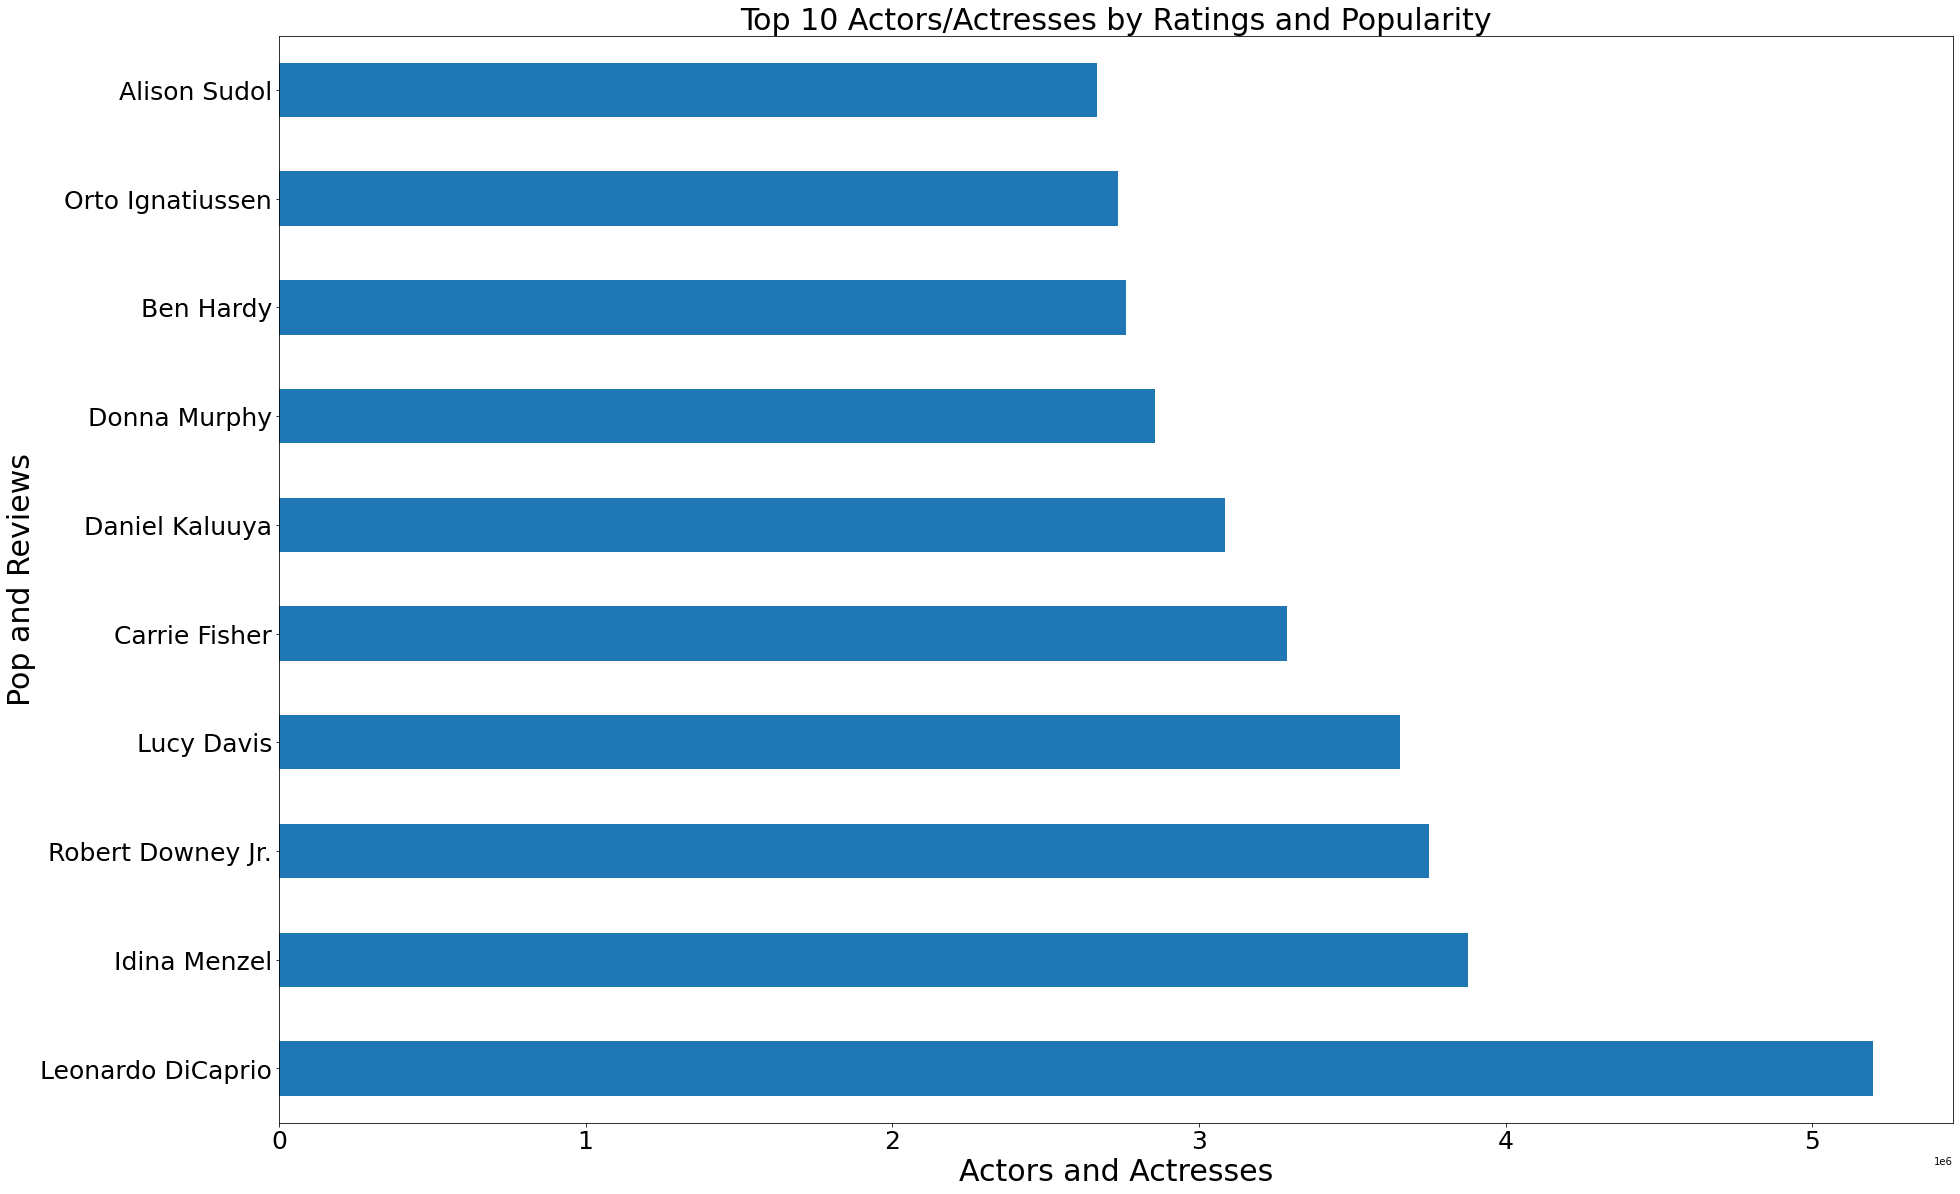

In [46]:
from matplotlib import pyplot as plt
top_10['pop_and_reviews'].plot(kind="barh",figsize=(30, 20),fontsize=25)
plt.title("Top 10 Actors/Actresses by Ratings and Popularity",fontsize=30)
plt.ylabel("Pop and Reviews",fontsize=30)
plt.xlabel("Actors and Actresses",fontsize=30)

plt.show
